In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import os
import skimage
import skimage.io
from skimage import transform
from skimage.transform import resize
from skimage.color import rgb2gray
import cv2

In [4]:
def load_data(data_dir):
    dirs = [d for d in os.listdir(data_dir)
            if os.path.isdir(os.path.join(data_dir,d))]
    
    labels = []
    images = []
    
    label_map = {label: inx for inx,label in enumerate(dirs)}
    
    for d in dirs:
        label_dir = os.path.join(data_dir,d)
        
        file_name = [os.path.join(label_dir,f)
                    for f in os.listdir(label_dir) 
                    if f.endswith(".jpg")]
        
        for f in file_name:
            print(f)
            img = skimage.io.imread(f)
            img_resize = resize(img, (28,28,3))
            gray_img = rgb2gray(img_resize)
            images.append(gray_img.flatten())
            labels.append(label_map[d])
    return images, labels

In [5]:
root_path = "/home/doaa/programming/ML/MLClassifieProject"
train_data_dir = os.path.join(root_path,"Training")
test_data_dir = os.path.join(root_path,"Test")

In [6]:
images , labels = load_data(train_data_dir)

/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_252.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_270.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_112.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_258.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_210.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_76.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_82.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r0_38.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_36.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_280.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r0_218.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/appl

In [7]:
len(images)

1160

In [8]:
flat_images = np.array(images)

In [9]:
target = np.array(labels)

In [10]:
df = pd.DataFrame(flat_images)

df['target'] = target

x_train = df.iloc[:,:-1]

y_train = df.iloc[:,-1]

In [11]:
images , labels = load_data(test_data_dir)

/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_27.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_175.jpg


/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_67.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_319.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_311.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_227.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_163.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_235.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_103.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_99.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_135.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_107.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_43.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_131.jpg
/home/doaa/programm

In [12]:
flat_test_images = np.array(images)

In [13]:
test_target = np.array(labels)

In [14]:
df = pd.DataFrame(flat_test_images)

df['target'] = test_target

x_test = df.iloc[:,:-1]

y_test = df.iloc[:,-1]

In [15]:
model = LogisticRegression(solver='liblinear')

history = model.fit(x_train,y_train)

In [16]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

1.0

In [18]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00        50

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578



In [19]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[160,   0,   0,   0,   0],
       [  0,  50,   0,   0,   0],
       [  0,   0, 162,   0,   0],
       [  0,   0,   0, 156,   0],
       [  0,   0,   0,   0,  50]])

<Axes: >

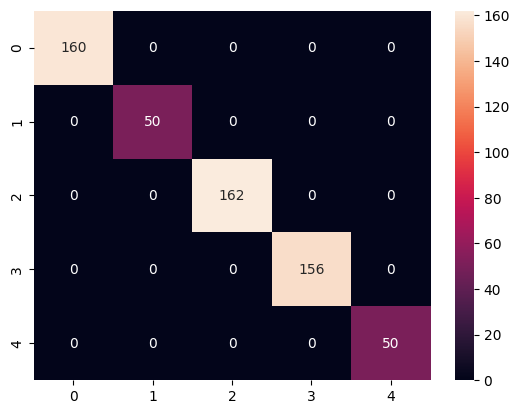

In [20]:
sns.heatmap(cm, annot=True, fmt='g')

In [21]:
y_pred_proba = model.predict_proba(x_test)

In [22]:
auc = roc_auc_score(y_test, y_pred_proba,multi_class='ovr')

auc

1.0

In [23]:
history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
for epoch in range(1, 51):
    model.set_params(max_iter=epoch)
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict_proba(x_train)
    y_test_pred = model.predict_proba(x_test)
    
    train_acc = accuracy_score(y_train, model.predict(x_train))
    val_acc = accuracy_score(y_test, model.predict(x_test))
    
    train_loss = log_loss(y_train, y_train_pred)
    val_loss = log_loss(y_test, y_test_pred)
    
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)

/home/doaa/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/doaa/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/doaa/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/doaa/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/doaa/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/doaa/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, in

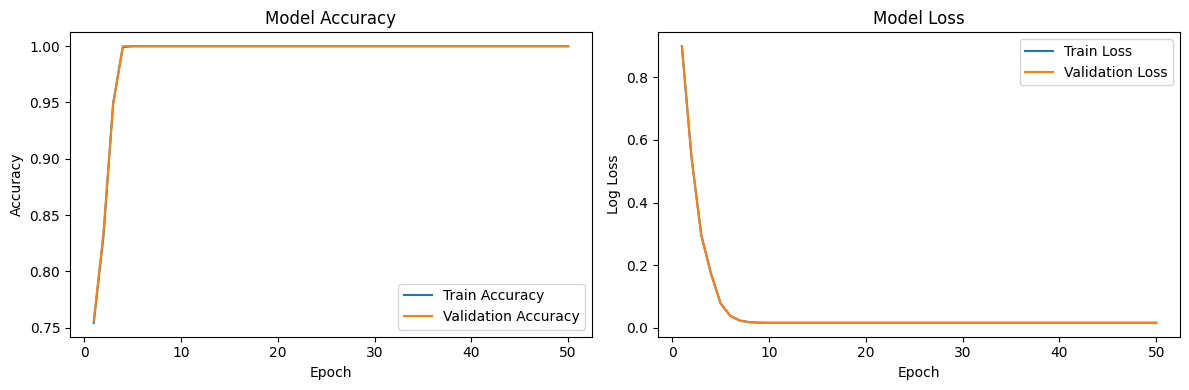

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(range(1, 51), history['train_acc'], label='Train Accuracy', color='tab:blue')
ax1.plot(range(1, 51), history['val_acc'], label='Validation Accuracy', color='tab:orange')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(range(1, 51), history['train_loss'], label='Train Loss', color='tab:blue')
ax2.plot(range(1, 51), history['val_loss'], label='Validation Loss', color='tab:orange')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Log Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [42]:
log_reg = LogisticRegression(penalty ='l1' ,solver='liblinear',max_iter=100)  
log_reg.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [43]:
y_pred_log = log_reg.predict(x_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [44]:
report = classification_report(y_test,y_pred_log)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00        50

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578



In [45]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[160,   0,   0,   0,   0],
       [  0,  50,   0,   0,   0],
       [  0,   0, 162,   0,   0],
       [  0,   0,   0, 156,   0],
       [  0,   0,   0,   0,  50]])

In [46]:
train_loss = log_loss(y_train, log_reg.predict_proba(x_train))
val_loss = log_loss(y_test, log_reg.predict_proba(x_test))

print(train_loss)
print(val_loss)

0.0324326021413963
0.03147392799789494
